In [8]:
#dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [10]:
#setting file path
file = Path("../datasets/covid19_vaccinations.csv")
vaccine_df = pd.read_csv(file)
vaccine_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [26]:
file = Path("../datasets/cleaned_provider_locations.csv")
provider_df = pd.read_csv(file)
provider_df.head()

/var/folders/3_/pnzxh0yn5lqbg2gh85_bx9gc0000gn/T/ipykernel_25514/864004048.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,29,31,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  provider_df = pd.read_csv(file)


,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,location_state,State Names,loc_admin_zip,...,Category,Unnamed Column,offers_free_masks,min_age_months,min_age_years,bridge_access_program,State Acronym,State,State and Mask,Total Providers
0,97b8a010-180f-4f77-a5f5-9b810ff33196,06151,(740) 397-5505,"CVS Pharmacy, Inc. #06151",900 COSHOCTON AVE,NaN,MOUNT VERNON,OH,Ohio,43050,...,covid,NaN,False,0.0,7.0,True,AL,Alabama,Ohio_FALSE,4143.0
1,7dca1ba8-8f67-4016-be85-c08dd997efe2,21230,470-520-7008,Walgreens Co. #21230,860 JOHNSON FERRY RD,STE 230,SANDY SPRINGS,GA,Georgia,30342-1453,...,covid,NaN,False,NaN,NaN,True,AK,Alaska,Georgia_FALSE,678.0
2,dbd22586-1d2d-437f-a385-54901765831e,00737,(716) 652-1813,"CVS Pharmacy, Inc. #00737",727 MAIN ST.,NaN,EAST AURORA,NY,New York,14052,...,covid,NaN,False,0.0,3.0,True,AZ,Arizona,New York_FALSE,5339.0
3,d15832f3-2082-4316-a541-8114be5711ab,09121,(619) 280-5006,"CVS Pharmacy, Inc. #09121",4404 EL CAJON BLVD,NaN,SAN DIEGO,CA,California,92115,...,covid,NaN,False,0.0,3.0,True,AR,Arkansas,California_FALSE,1605.0
4,eef3a767-3372-4e4b-aaa6-6070c3431fb2,04190,(706) 886-6876,"CVS Pharmacy, Inc. #04190",959 BIG A ROAD,NaN,TOCCOA,GA,Georgia,30577,...,covid,NaN,False,0.0,13.0,True,CA,California,Georgia_FALSE,19978.0


In [16]:
renamed_vaccines = vaccine_df.rename(columns = {"Jurisdiction (State/Territory) or Federal Entity": "State"})
renamed_vaccines.head()

,State,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [18]:
renamed_vaccines.columns

Index(['State', 'Total doses distributed', 'Doses distributed per 100k pop',
       'Doses distributed by jurisdiction per 100k of 18+ pop',
       'Total doses administered by jurisdiction',
       'Doses administered by jurisdiction per 100k pop',
       'Doses administered by jurisdiction to 18+ pop',
       'Doses administered by jurisdiction per 100k of 18+ pop',
       'Residents with at least one dose',
       'Percent of total pop with at least one dose',
       'Residents 18+ with at least one dose',
       'Percent of 18+ pop with at least one dose',
       'Residents with a completed primary series',
       'Percent of total pop with a completed primary series',
       'Residents 18+ with a completed primary series',
       'Percent of 18+ pop with a completed primary series',
       'Total number of original Pfizer doses distributed',
       'Total number of Pfizer updated booster doses distributed',
       'Total number of original Moderna doses distributed',
       'Total

In [21]:
filtered_ages = renamed_vaccines[["State","Percent of 5+ pop with a completed primary series",
                                 "Percent of 12+ pop with a completed primary series",
                                 "Percent of 18+ pop with a completed primary series",
                                 "Percent of 65+ pop with a completed primary series"]]
filtered_ages.head()

,State,Percent of 5+ pop with a completed primary series,Percent of 12+ pop with a completed primary series,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series
0,United States,73.5,77.6,79.1,94.4
1,Alaska,69.8,74.4,75.9,89.5
2,Alabama,56.6,61.0,63.3,85.3
3,Arkansas,60.6,65.0,66.8,84.2
4,American Samoa,95.0,95.0,95.0,91.4


In [27]:
merged_df = pd.merge(filtered_ages, provider_df, on = "State")
merged_df.head()

,State,Percent of 5+ pop with a completed primary series,Percent of 12+ pop with a completed primary series,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,...,longitude,Category,Unnamed Column,offers_free_masks,min_age_months,min_age_years,bridge_access_program,State Acronym,State and Mask,Total Providers
0,Alaska,69.8,74.4,75.9,89.5,7dca1ba8-8f67-4016-be85-c08dd997efe2,21230,470-520-7008,Walgreens Co. #21230,860 JOHNSON FERRY RD,...,-84.359093,covid,NaN,False,NaN,NaN,True,AK,Georgia_FALSE,678.0
1,Alabama,56.6,61.0,63.3,85.3,97b8a010-180f-4f77-a5f5-9b810ff33196,06151,(740) 397-5505,"CVS Pharmacy, Inc. #06151",900 COSHOCTON AVE,...,-82.456235,covid,NaN,False,0.0,7.0,True,AL,Ohio_FALSE,4143.0
2,Arkansas,60.6,65.0,66.8,84.2,d15832f3-2082-4316-a541-8114be5711ab,09121,(619) 280-5006,"CVS Pharmacy, Inc. #09121",4404 EL CAJON BLVD,...,-117.099910,covid,NaN,False,0.0,3.0,True,AR,California_FALSE,1605.0
3,Arizona,70.2,74.1,75.2,90.8,dbd22586-1d2d-437f-a385-54901765831e,00737,(716) 652-1813,"CVS Pharmacy, Inc. #00737",727 MAIN ST.,...,-78.607601,covid,NaN,False,0.0,3.0,True,AZ,New York_FALSE,5339.0
4,California,79.1,83.1,83.9,93.2,eef3a767-3372-4e4b-aaa6-6070c3431fb2,04190,(706) 886-6876,"CVS Pharmacy, Inc. #04190",959 BIG A ROAD,...,-83.307920,covid,NaN,False,0.0,13.0,True,CA,Georgia_FALSE,19978.0


In [30]:
filtered_merge = merged_df[["State",
                          "Percent of 5+ pop with a completed primary series",
                          "Percent of 12+ pop with a completed primary series",
                          "Percent of 18+ pop with a completed primary series",
                          "Percent of 65+ pop with a completed primary series"]]
filtered_merge.head()

,State,Percent of 5+ pop with a completed primary series,Percent of 12+ pop with a completed primary series,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series
0,Alaska,69.8,74.4,75.9,89.5
1,Alabama,56.6,61.0,63.3,85.3
2,Arkansas,60.6,65.0,66.8,84.2
3,Arizona,70.2,74.1,75.2,90.8
4,California,79.1,83.1,83.9,93.2


In [34]:
merged = filtered_merge.set_index("State")
filtered_merge.head(50)

,State,Percent of 5+ pop with a completed primary series,Percent of 12+ pop with a completed primary series,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series
0,Alaska,69.8,74.4,75.9,89.5
1,Alabama,56.6,61.0,63.3,85.3
2,Arkansas,60.6,65.0,66.8,84.2
3,Arizona,70.2,74.1,75.2,90.8
4,California,79.1,83.1,83.9,93.2
5,Colorado,77.7,81.5,82.9,95.0
6,Connecticut,87.1,90.7,91.7,95.0
7,Delaware,77.6,81.7,83.2,95.0
8,Florida,73.5,77.9,79.6,94.4
9,Georgia,61.1,65.6,67.7,86.8


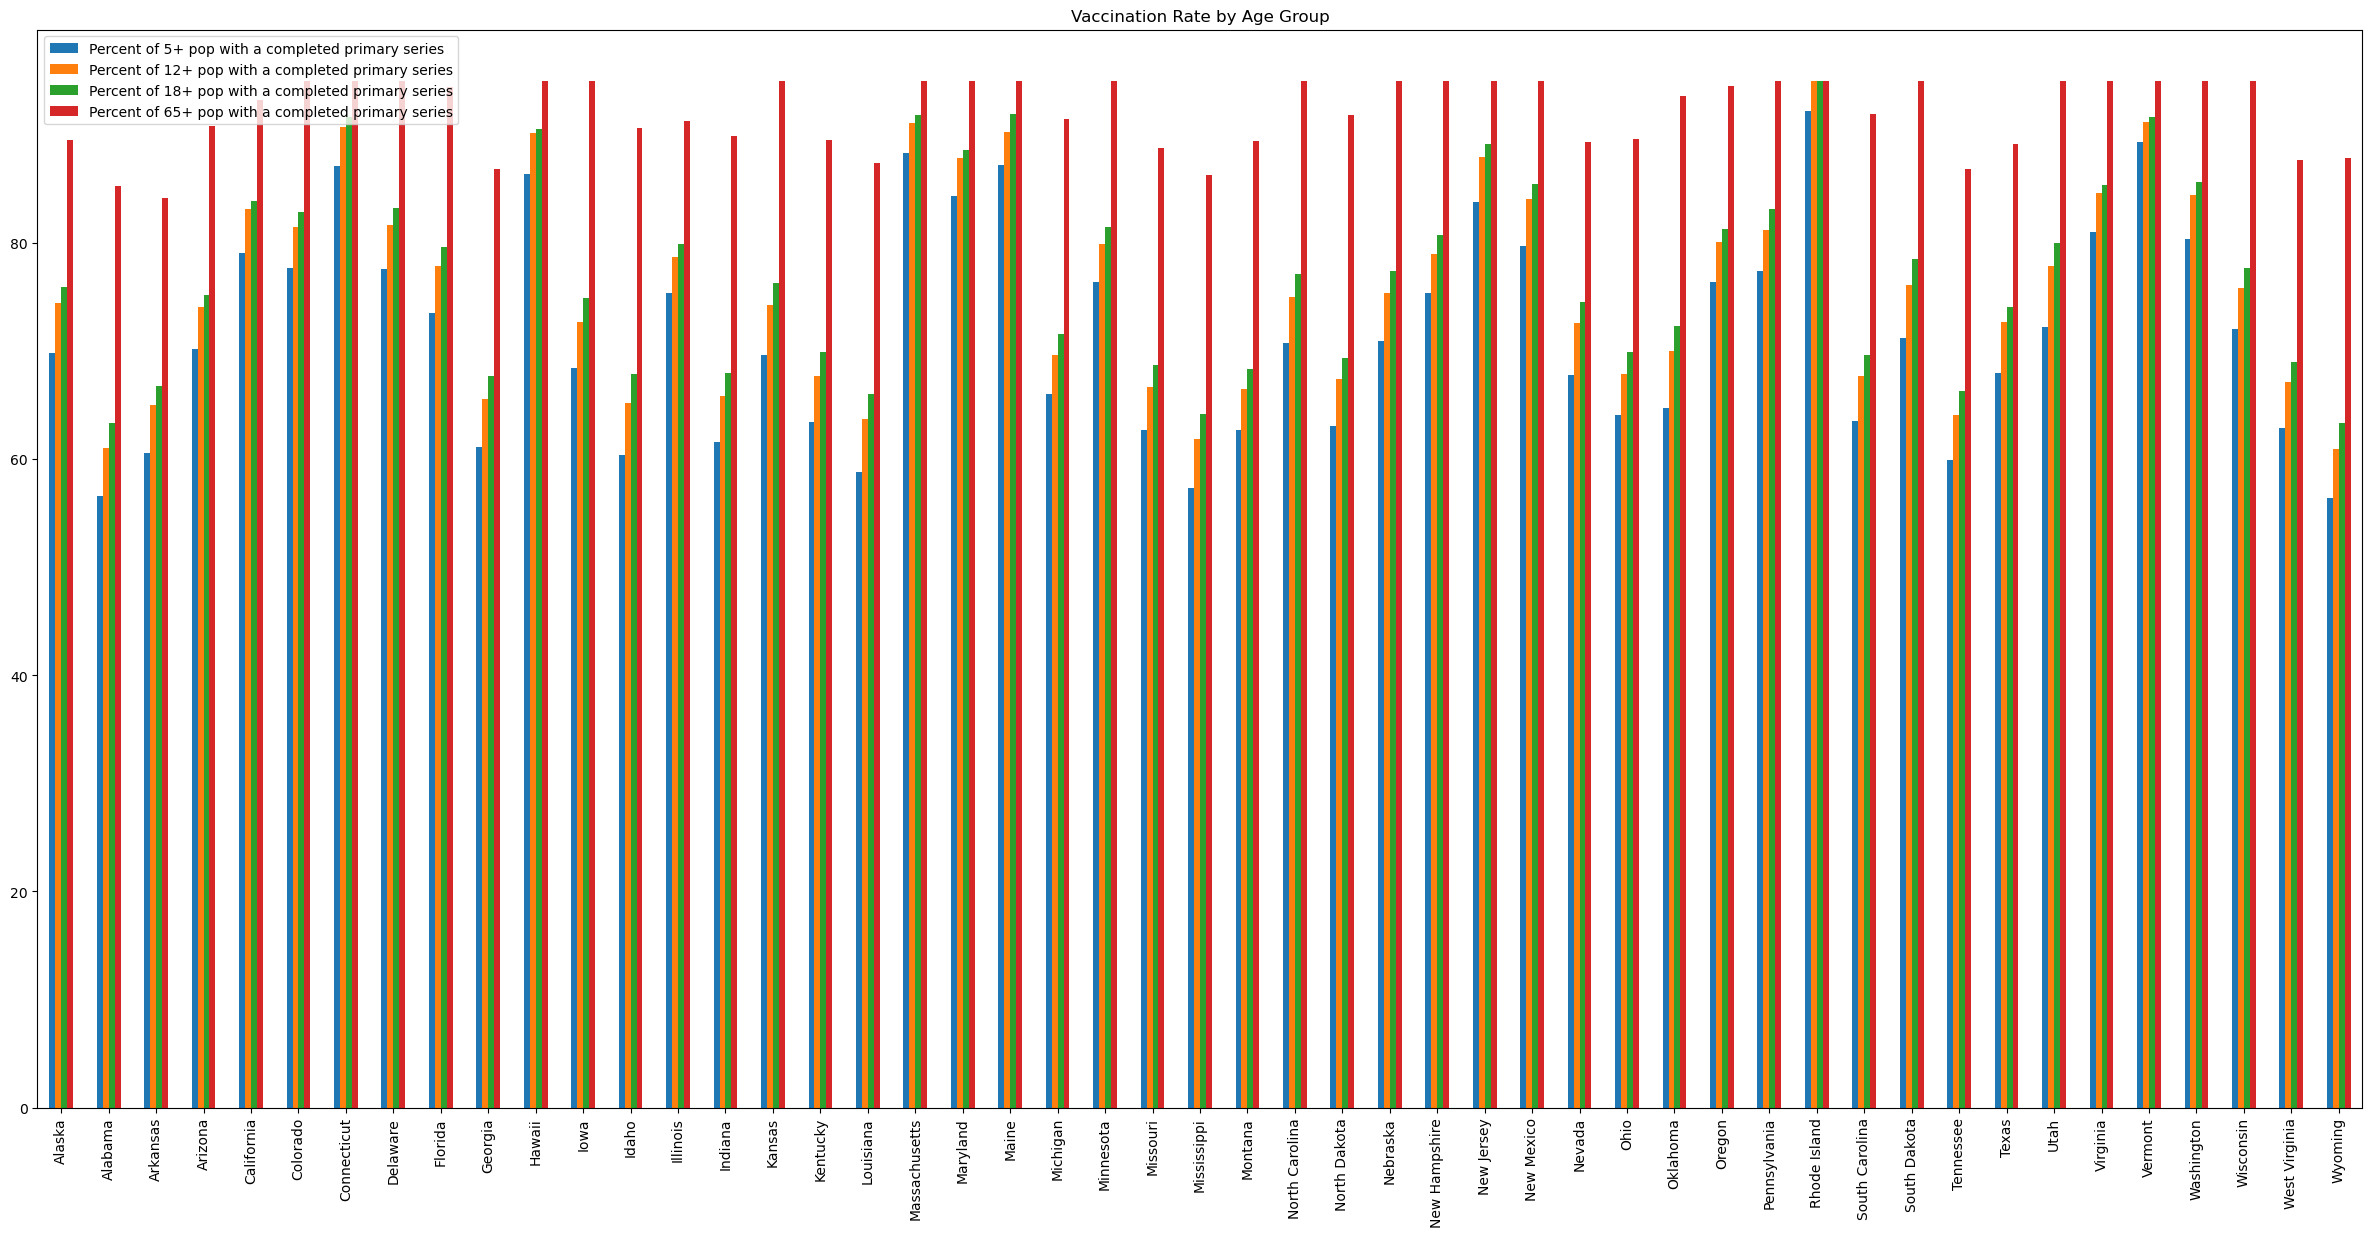

In [36]:
#creating a multi bar graph comparing vaccination by age per state
multi_plot = filtered_merge.plot(kind="bar", figsize=(30,14))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(filtered_merge["State"], rotation=90)
plt.title("Vaccination Rate by Age Group")
#saving the graph
plt.savefig("age_vaccination_multiplot.png")
#showing the plot
plt.show()

In [34]:
vaccine_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [39]:
us_total = vaccine_df.iloc[0,:]
us_total.head()

Jurisdiction (State/Territory) or Federal Entity         United States
Total doses distributed                                      984444295
Doses distributed per 100k pop                                296511.0
Doses distributed by jurisdiction per 100k of 18+ pop         381249.0
Total doses administered by jurisdiction                     676728782
Name: 0, dtype: object

In [42]:
new_vaccine = vaccine_df[["Jurisdiction (State/Territory) or Federal Entity", "Percent of 5+ pop with a completed primary series",
                          "Percent of 12+ pop with a completed primary series",
                          "Percent of 18+ pop with a completed primary series",
                          "Percent of 65+ pop with a completed primary series"]]
new_vaccine.head()

,Jurisdiction (State/Territory) or Federal Entity,Percent of 5+ pop with a completed primary series,Percent of 12+ pop with a completed primary series,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series
0,United States,73.5,77.6,79.1,94.4
1,Alaska,69.8,74.4,75.9,89.5
2,Alabama,56.6,61.0,63.3,85.3
3,Arkansas,60.6,65.0,66.8,84.2
4,American Samoa,95.0,95.0,95.0,91.4


In [53]:
us_total = new_vaccine.iloc[0,:]
print(us_total)

Jurisdiction (State/Territory) or Federal Entity      United States
Percent of 5+ pop with a completed primary series              73.5
Percent of 12+ pop with a completed primary series             77.6
Percent of 18+ pop with a completed primary series             79.1
Percent of 65+ pop with a completed primary series             94.4
Name: 0, dtype: object


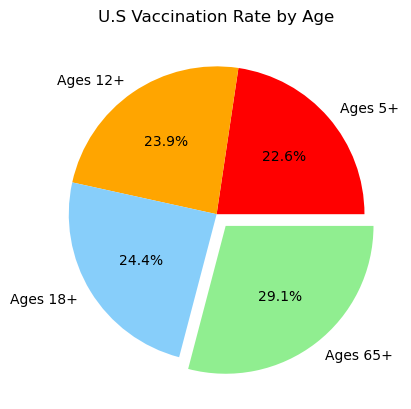

In [17]:
labels = ["Ages 5+","Ages 12+","Ages 18+","Ages 65+"]
sizes = [73.5, 77.6, 79.1, 94.4]
colors = ["red", "orange", "lightskyblue", "lightgreen"]
explode = (0,0,0,0.1)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("U.S Vaccination Rate by Age")

#saving pie
plt.savefig("vaccinated_age_pie")
#showing pie
plt.show()